# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make prediction, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100) #100 sono molto pochi dati!!!
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0. # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

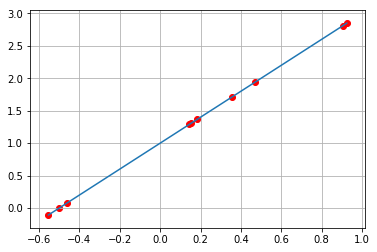

In [3]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model_trial = tf.keras.Sequential()
model_trial.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model_trial.compile(optimizer='sgd', loss='mse', metrics=['mse'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
# get a summary of our composed model
model_trial.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model_trial.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 100 samples, validate on 10 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 0s 4ms/sample - loss: 4.0082 - mean_squared_error: 4.0082 - val_loss: 4.6121 - val_mean_squared_error: 4.6121
Epoch 2/30
100/100 [==============================] - 0s 121us/sample - loss: 3.7521 - mean_squared_error: 3.7521 - val_loss: 4.1975 - val_mean_squared_error: 4.1975
Epoch 3/30
100/100 [==============================] - 0s 110us/sample - loss: 3.4635 - mean_squared_error: 3.4635 - val_loss: 3.9086 - val_mean_squared_error: 3.9086
Epoch 4/30
100/100 [==============================] - 0s 217us/sample - loss: 3.2546 - mean_squared_error: 3.2546 - val_loss: 3.5893 - val_mean_squared_error: 3.5893
Epoch 5/30
100/100 [==============================] - 0s 193us/sample - loss: 3.0280 - mean_squared_error: 3.0280 - val_loss: 3.3907 - val_mean_squared_error: 3.3907
Epoch 6/30
100/100 [==============================] - 0s 255us/sample - loss: 2

In [7]:
# return weights
model_trial.get_weights()

[array([[0.57057106]], dtype=float32), array([0.8129463], dtype=float32)]

In [8]:
# evaluate model
score = model_trial.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test loss:', score[1])

10/10 [==============================] - 0s 113us/sample - loss: 0.7083 - mean_squared_error: 0.7083

Test loss: 0.7082532644271851
Test loss: 0.70825326


In [9]:
# evaluate model with the exact curve
score = model_trial.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test loss:', score[1])

10/10 [==============================] - 0s 197us/sample - loss: 0.7083 - mean_squared_error: 0.7083

Test loss: 0.7082532644271851
Test loss: 0.70825326


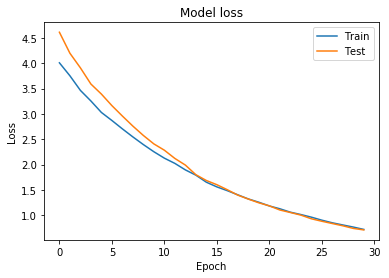

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

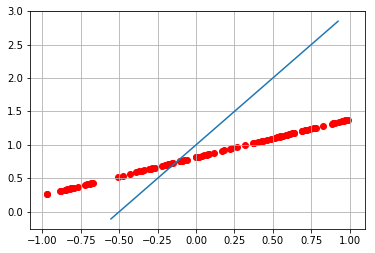

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model_trial.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### <font color="red">Exercise 11.1: Exploring different parameters for the previous NN <font>

In order to make practice with NNs, now we will keep one neuron, just as in the case above, and explore different combinations of number of epochs, $N_{\mathrm{epochs}}$, number of data points $N_{\mathrm{train}}$ and noise $\sigma$ to see how the result of the fit changes. Note that, since we are working with one neuron only and it has no activation function, the parameter weighting the input is the $m$ of a line and the bias is $q$ (the neuron can only represent a line in this conditions), so we can see $m$ of the fit directly in the output parameters. 

We observed that:
- by only changing the number of training data to $1000$ (and the validation data to on tenth of it, as we will always do) the fit becomes almost perfect;
- adding a noise of $0.1$ doesn't change significantly the $1000$ case, but there was nothing to improve;
- changing the number of training data to $400$ with no noise gives a really good fit, launching it various times we get values around $m\approx1.98$;
- changing the number of training data to $300$ with no noise gives an honest $m\approx1.9$ fit;
- adding a noise of $0.1$ or $0.2$ to the $300$ case gets results quite close to the previous
- bringing the noise to $0.4$  is not healty and makes the fit worse $m\approx1.8$, it's obviously because the data set are quite a few, if they are also very noisy it's difficult for the NN to interpret them;
- keeping the noise to $0.4$ but changing the training data number to $600$ brings the fit to a perfect $m\approx2$ result;
- adding a $0.4$ noise to the $100$ case gives horrible results;
- increasing the epochs makes the fit better but there is no risk of overfitting, being the single neuron a so simple model;
- increasing the epochs from $50$ to $500$ in the $100$ case with no noise makes the fit almost perfect.

Below we show the case $\sigma=0.4$, $\ N_{\mathrm{epochs}}=10$, $\ N_{\mathrm{train}}=600$.

Again:

$$
f(x)=2x+1
$$

In [12]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [13]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 600) #100 sono molto pochi dati!!!
x_valid = np.random.uniform(-1, 1, 60)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.4 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

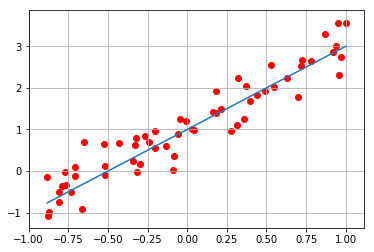

In [14]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [15]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model_1 = tf.keras.Sequential()
model_1.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model_1.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [16]:
# get a summary of our composed model
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model_1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 600 samples, validate on 60 samples
Epoch 1/50
600/600 [==============================] - 0s 609us/sample - loss: 1.1979 - mean_squared_error: 1.1979 - val_loss: 1.0003 - val_mean_squared_error: 1.0003
Epoch 2/50
600/600 [==============================] - 0s 46us/sample - loss: 0.7511 - mean_squared_error: 0.7511 - val_loss: 0.6542 - val_mean_squared_error: 0.6542
Epoch 3/50
600/600 [==============================] - 0s 54us/sample - loss: 0.5168 - mean_squared_error: 0.5168 - val_loss: 0.4634 - val_mean_squared_error: 0.4634
Epoch 4/50
600/600 [==============================] - 0s 47us/sample - loss: 0.3872 - mean_squared_error: 0.3872 - val_loss: 0.3526 - val_mean_squared_error: 0.3526
Epoch 5/50
600/600 [==============================] - 0s 51us/sample - loss: 0.3113 - mean_squared_error: 0.3113 - val_loss: 0.2874 - val_mean_squared_error: 0.2874
Epoch 6/50
600/600 [==============================] - 0s 49us/sample - loss: 0.2648 - mean_squared_error: 0.2648 - val_loss: 0.24

In [18]:
# return weights
model_1.get_weights()

[array([[2.00806]], dtype=float32), array([0.9769394], dtype=float32)]

In [19]:
# evaluate model
score = model_1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test loss:', score[1])

60/60 [==============================] - 0s 119us/sample - loss: 0.1563 - mean_squared_error: 0.1563

Test loss: 0.156337171792984
Test loss: 0.15633717


In [20]:
# evaluate model with the exact curve
score = model_1.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test loss:', score[1])

60/60 [==============================] - 0s 78us/sample - loss: 5.5322e-04 - mean_squared_error: 5.5322e-04

Test loss: 0.000553218675001214
Test loss: 0.00055321865


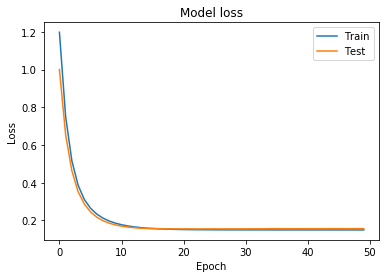

In [21]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

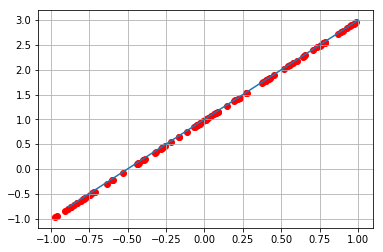

In [22]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model_1.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### <font color="red">Exercise 11.2: fitting a cubic polynomial <font>

Now we try to exploit a NN to obtain a fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

This time we will fix the initial condition of all the NNs: $1000$ training data, $100$ validation data, all produced with a Gaussian error of $\sigma=0.2$ with respect to the exact curve and we'll keep the number of training epochs fixed to $60$.

On the other hand, we will explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function

In [23]:
# target parameters of f(x) = a + b*x + c*x*x + d*x*x*x
a = 4
b = -3
c = -2
d = +3

In [24]:
import numpy as np

number_train=1000
number_valid=100

# generate training inputs
np.random.seed(17)
x_train = np.random.uniform(-1, 1, number_train)
x_valid = np.random.uniform(-1, 1, number_valid)
x_valid.sort()

y_target = a + b*x_valid + c*x_valid*x_valid + d*x_valid*x_valid*x_valid # ideal (target) function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a + b*x_train + c*x_train*x_train + d*x_train*x_train*x_train, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b*x_valid + c*x_valid*x_valid + d*x_valid*x_valid*x_valid, sigma)

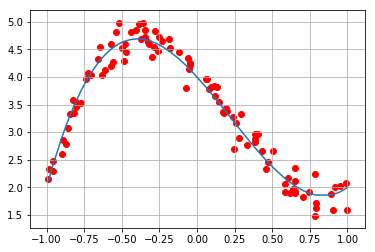

In [25]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

### Activation functions (we keep fixed stochastic gradient descent as optimizer and mean squared error as loss function)

Softplus seems to be of little use in this case.

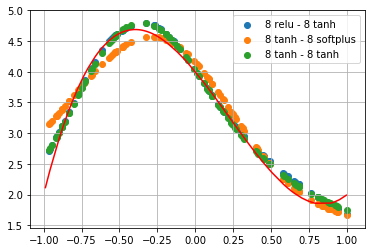

In [26]:
model_8_relu_8_tanh=tf.keras.models.load_model(filepath='save/8_relu_8_tanh')

model_8_tanh_8_softplus=tf.keras.models.load_model(filepath='save/8_tanh_8_softplus')

model_8_tanh_8_tanh=tf.keras.models.load_model(filepath='save/8_tanh_8_tanh')

x_predicted = np.random.uniform(-1, 1, 100)
plt.scatter(x_predicted, model_8_relu_8_tanh.predict(x_predicted),label='8 relu - 8 tanh')
plt.scatter(x_predicted, model_8_tanh_8_softplus.predict(x_predicted),label='8 tanh - 8 softplus')
plt.scatter(x_predicted, model_8_tanh_8_tanh.predict(x_predicted),label='8 tanh - 8 tanh')
plt.legend()
plt.plot(x_valid, y_target,color='r')
plt.grid(True)
plt.show()

### Layer depth (we keep fixed stochastic gradient descent as optimizer and mean squared error as loss function)

It's better to have a deep network, than a network with fewer layers but the same number of parameters, it is clear from the picture below, where the deeper network fits better the data, altough having less paramaters than the other.

It is natural that increasing the model complexity, alias the number of parameters, improves the results of fit on training data. The risk of increasing too much the complexity is to obtain a model that overfits the data, but it is difficult to see an overfitting with this data and these neural networks.

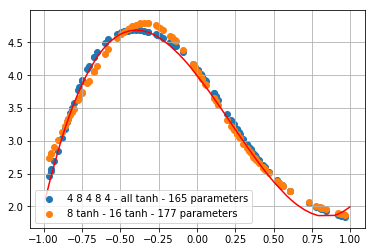

In [27]:
model_8_tanh_16_tanh=tf.keras.models.load_model(filepath='save/8_tanh_16_tanh')
model_4_8_4_8_4_tanh=tf.keras.models.load_model(filepath='save/4_8_4_8_4_tanh')

x_predicted = np.random.uniform(-1, 1, 100)
plt.scatter(x_predicted, model_4_8_4_8_4_tanh.predict(x_predicted),label='4 8 4 8 4 - all tanh - 165 parameters')
plt.scatter(x_predicted, model_8_tanh_16_tanh.predict(x_predicted),label='8 tanh - 16 tanh - 177 parameters')
plt.legend()
plt.plot(x_valid, y_target,color='r')
plt.grid(True)
plt.show()

### Optimizer (we keep mean squared error as loss function)

The SGD wins with no effort.

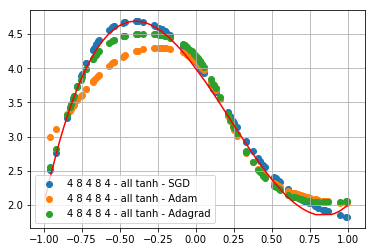

In [28]:
model_4_8_4_8_4_tanh_adagrad=tf.keras.models.load_model(filepath='save/4_8_4_8_4_tanh_adagrad')
model_4_8_4_8_4_tanh_adam=tf.keras.models.load_model(filepath='save/4_8_4_8_4_tanh_adam')
model_4_8_4_8_4_tanh=tf.keras.models.load_model(filepath='save/4_8_4_8_4_tanh')

x_predicted = np.random.uniform(-1, 1, 100)
plt.scatter(x_predicted, model_4_8_4_8_4_tanh.predict(x_predicted),label='4 8 4 8 4 - all tanh - SGD')
plt.scatter(x_predicted, model_4_8_4_8_4_tanh_adagrad.predict(x_predicted),label='4 8 4 8 4 - all tanh - Adam')
plt.scatter(x_predicted, model_4_8_4_8_4_tanh_adam.predict(x_predicted),label='4 8 4 8 4 - all tanh - Adagrad')
plt.legend()
plt.plot(x_valid, y_target,color='r')
plt.grid(True)
plt.show()

### Loss function (we keep fixed stochastic gradient descent as optimizer)

This time the mean squared error and mean absolute error are close, but the former is a bit closer to the analytic curve.

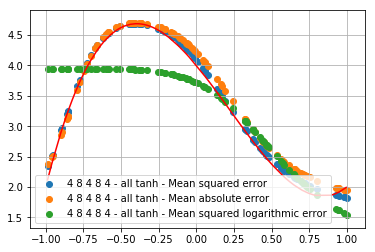

In [29]:
model_4_8_4_8_4_tanh_mae=tf.keras.models.load_model(filepath='save/4_8_4_8_4_tanh_msle')
model_4_8_4_8_4_tanh_msle=tf.keras.models.load_model(filepath='save/4_8_4_8_4_tanh_mae')
model_4_8_4_8_4_tanh=tf.keras.models.load_model(filepath='save/4_8_4_8_4_tanh')

x_predicted = np.random.uniform(-1, 1, 100)
plt.scatter(x_predicted, model_4_8_4_8_4_tanh.predict(x_predicted),label='4 8 4 8 4 - all tanh - Mean squared error')
plt.scatter(x_predicted, model_4_8_4_8_4_tanh_msle.predict(x_predicted),label='4 8 4 8 4 - all tanh - Mean absolute error')
plt.scatter(x_predicted, model_4_8_4_8_4_tanh_mae.predict(x_predicted),label='4 8 4 8 4 - all tanh - Mean squared logarithmic error')
plt.legend()
plt.plot(x_valid, y_target,color='r')
plt.grid(True)
plt.show()

### Fitting inside and outside the interval

Now we take a good neaural network (according to what we have seen before) and see how it performs inside and outside the interval on which it has been trained.

The result is that the prediction is good inside the training interval, but awful outside. It comes as no surprise: it is difficult for a neural network to generalize its prediction outside the interval in which it has been trained.

In [30]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model_2 = tf.keras.Sequential()

model_2.add(Dense(8, input_shape=(1,), activation='tanh'))

model_2.add(Dense(8, activation='tanh'))

model_2.add(Dense(8, activation='tanh'))

model_2.add(Dense(8, activation='tanh'))

model_2.add(Dense(8, activation='tanh'))

model_2.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model_2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [31]:
# get a summary of our composed model
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [32]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model_2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=60,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1000 samples, validate on 100 samples
Epoch 1/60
1000/1000 [==============================] - 1s 836us/sample - loss: 2.6528 - mean_squared_error: 2.6528 - val_loss: 0.5025 - val_mean_squared_error: 0.5025
Epoch 2/60
1000/1000 [==============================] - 0s 93us/sample - loss: 0.3543 - mean_squared_error: 0.3543 - val_loss: 0.3636 - val_mean_squared_error: 0.3636
Epoch 3/60
1000/1000 [==============================] - 0s 68us/sample - loss: 0.3234 - mean_squared_error: 0.3234 - val_loss: 0.3578 - val_mean_squared_error: 0.3578
Epoch 4/60
1000/1000 [==============================] - 0s 73us/sample - loss: 0.3183 - mean_squared_error: 0.3183 - val_loss: 0.3512 - val_mean_squared_error: 0.3512
Epoch 5/60
1000/1000 [==============================] - 0s 80us/sample - loss: 0.3111 - mean_squared_error: 0.3111 - val_loss: 0.3447 - val_mean_squared_error: 0.3447
Epoch 6/60
1000/1000 [==============================] - 0s 91us/sample - loss: 0.3044 - mean_squared_error: 0.3044 - 

In [33]:
# evaluate model
score = model_2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test loss:', score[1])

100/100 [==============================] - 0s 167us/sample - loss: 0.0382 - mean_squared_error: 0.0382

Test loss: 0.038215909302234646
Test loss: 0.03821591


In [34]:
# evaluate model with the exact curve
score = model_2.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test loss:', score[1])

100/100 [==============================] - 0s 216us/sample - loss: 0.0031 - mean_squared_error: 0.0031

Test loss: 0.003144601583480835
Test loss: 0.0031446016


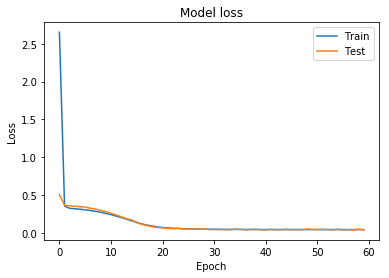

In [35]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

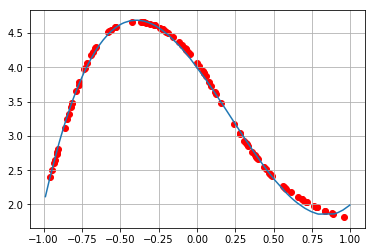

In [36]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model_2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

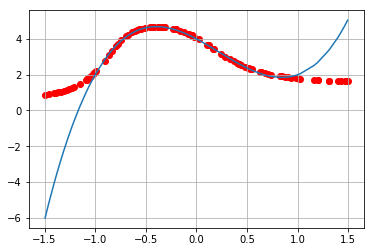

In [37]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = model_2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
x_predicted.sort()
plt.plot(x_predicted, a + b*x_predicted + c*x_predicted*x_predicted + d*x_predicted*x_predicted*x_predicted)
plt.grid(True)
plt.show()

### <font color="red">Exercise 11.3: fit of a 2D function  <font>

Now we try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

We used a dense network with three layers of neuron: 16, 32 and 16 neurons in order. The result is quite good, considering that the mean squared error upon the validation data is around $0.095$ and upon the target data, namely the values of the function with no noise added, is a very good $0.005$.

In [38]:
import numpy as np

number_train=10000
number_valid=1000

# generate training inputs
np.random.seed(17)

x_train = np.random.uniform(-1.5, 1.5, number_train)
x_train=np.resize(x_train,(2,number_train))
x_train[1]=np.random.uniform(-1.5, 1.5, number_train)
x_valid = np.random.uniform(-1.5, 1.5, number_train)
x_valid=np.resize(x_valid,(2,number_train))
x_valid[1]=np.random.uniform(-1.5, 1.5, number_train)

y_target = np.sin(x_valid[0]*x_valid[0] + x_valid[1]*x_valid[1]) # ideal (target) function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(np.sin(x_train[0]*x_train[0] + x_train[1]*x_train[1]), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(np.sin(x_valid[0]*x_valid[0] + x_valid[1]*x_valid[1]), sigma)

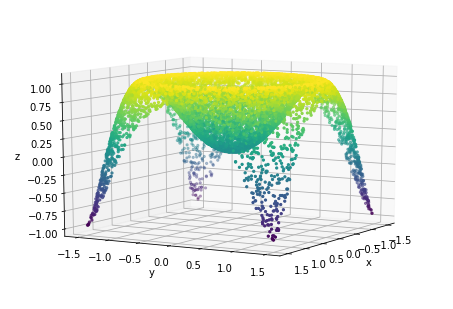

In [39]:
# plot training and target dataset
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_valid[0], x_valid[1], y_target, c=y_target, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [40]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model_3 = tf.keras.Sequential()
model_3.add(Dense(16, input_shape=(2,), activation='relu'))

model_3.add(Dense(32, activation='tanh'))

model_3.add(Dense(16, activation='relu'))

model_3.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model_3.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [41]:
# get a summary of our composed model
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_9 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 1,137
Trainable params: 1,137
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [42]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model_3.fit(x=np.transpose(x_train) ,y=y_train,
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(np.transpose(x_valid), y_valid))

Train on 10000 samples, validate on 10000 samples
Epoch 1/40
10000/10000 [==============================] - 4s 447us/sample - loss: 0.2314 - mean_squared_error: 0.2314 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 2/40
10000/10000 [==============================] - 4s 391us/sample - loss: 0.2086 - mean_squared_error: 0.2086 - val_loss: 0.2121 - val_mean_squared_error: 0.2121
Epoch 3/40
10000/10000 [==============================] - 4s 374us/sample - loss: 0.1974 - mean_squared_error: 0.1974 - val_loss: 0.1991 - val_mean_squared_error: 0.1991
Epoch 4/40
10000/10000 [==============================] - 3s 313us/sample - loss: 0.1852 - mean_squared_error: 0.1852 - val_loss: 0.1845 - val_mean_squared_error: 0.1845
Epoch 5/40
10000/10000 [==============================] - 4s 362us/sample - loss: 0.1714 - mean_squared_error: 0.1714 - val_loss: 0.1695 - val_mean_squared_error: 0.1695
Epoch 6/40
10000/10000 [==============================] - 4s 388us/sample - loss: 0.1571 - mean_squa

In [43]:
# evaluate model
score = model_3.evaluate(np.transpose(x_valid), y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test loss:', score[1])

10000/10000 [==============================] - 1s 150us/sample - loss: 0.0935 - mean_squared_error: 0.0935

Test loss: 0.09353402248620987
Test loss: 0.09353406


In [44]:
# evaluate model with the exact curve
score = model_3.evaluate(np.transpose(x_valid), y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test loss:', score[1])

10000/10000 [==============================] - 2s 159us/sample - loss: 0.0033 - mean_squared_error: 0.0033

Test loss: 0.003327888264134526
Test loss: 0.0033278894


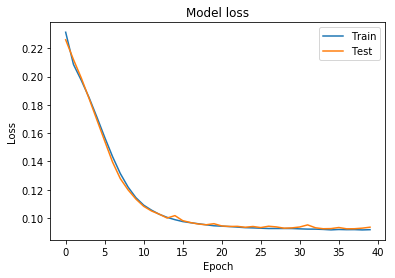

In [45]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

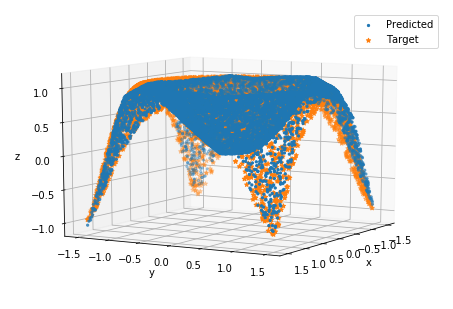

In [46]:
x_predicted = np.random.uniform(-1.5, 1.5, number_train)
x_predicted=np.resize(x_predicted,(2,number_train))
x_predicted[1]=np.random.uniform(-1.5, 1.5, number_train)

y_predicted = model_3.predict(np.transpose(x_predicted))

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_predicted[0], x_predicted[1], y_predicted, marker='.',label="Predicted")
ax.scatter(x_valid[0], x_valid[1], y_target, marker='*',label="Target")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
ax.legend()
plt.show()